In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Load CSV data into DataFrame
df = pd.read_csv("linkedin_posts.csv", parse_dates=["date"])

Average Monthly Posting Frequency:
month
2023-12    2
2024-01    3
2024-02    3
2024-03    3
2024-04    3
2024-05    3
2024-06    4
2024-07    4
2024-08    5
2024-09    4
2024-10    1
Freq: M, dtype: int64


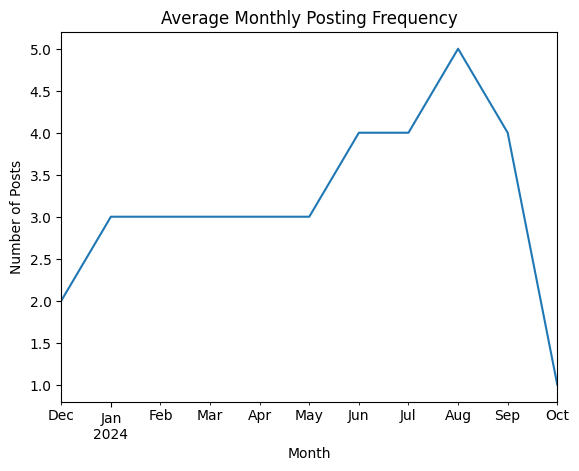

In [11]:
# 1. Average Monthly Posting Frequency
df['month'] = df['date'].dt.to_period("M")
monthly_frequency = df.groupby('month').size()
print("Average Monthly Posting Frequency:")
print(monthly_frequency)
monthly_frequency.plot(kind='line', title="Average Monthly Posting Frequency")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.savefig("average_monthly_posting_frequency.png")
plt.show()

In [12]:
# 2. Average Post Length
df['post_length'] = df['content'].apply(len)
avg_post_length = df['post_length'].mean()
print(f"Average Post Length: {avg_post_length}")

Average Post Length: 37.02857142857143


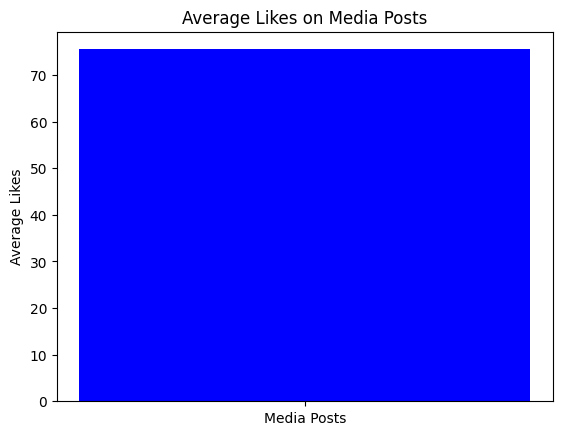

In [13]:
# 3. Average Likes on Media Posts (Bar Graph)
media_posts = df[df['has_media'] == True]
media_likes_avg = media_posts['likes'].mean()
plt.bar(['Media Posts'], [media_likes_avg], color='blue')
plt.title("Average Likes on Media Posts")
plt.ylabel("Average Likes")
plt.savefig("average_likes_on_media_posts.png")
plt.show()

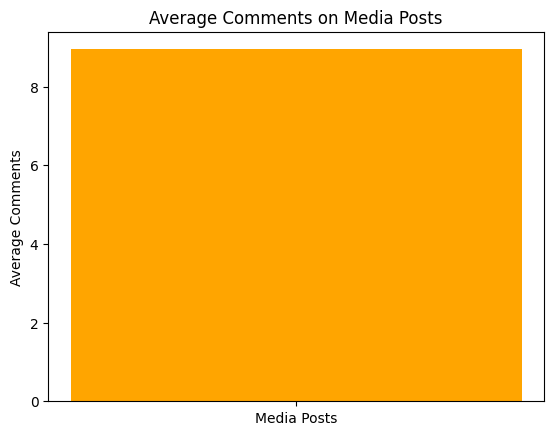

In [14]:

# 4. Average Comments on Media Posts (Bar Graph)
media_comments_avg = media_posts['comments'].mean()
plt.bar(['Media Posts'], [media_comments_avg], color='orange')
plt.title("Average Comments on Media Posts")
plt.ylabel("Average Comments")
plt.savefig("average_comments_on_media_posts.png")
plt.show()

In [15]:
# 5. Engagement Rate (Likes + Comments per Post)
df['engagement'] = df['likes'] + df['comments']
avg_engagement = df['engagement'].mean()
print(f"Average Engagement Rate per Post: {avg_engagement}")

Average Engagement Rate per Post: 70.51428571428572


In [16]:
analysis_summary = {
    "Average Monthly Posting Frequency": monthly_frequency.mean(),
    "Average Post Length": avg_post_length,
    "Average Likes on Media Posts": media_likes_avg,
    "Average Comments on Media Posts": media_comments_avg,
    "Average Engagement Rate per Post": avg_engagement,
}

In [17]:
# Write summary to file
with open("analysis_summary.txt", "w") as f:
    for key, value in analysis_summary.items():
        f.write(f"{key}: {value}\n")
print("\nAnalysis summary saved to analysis_summary.txt")


Analysis summary saved to analysis_summary.txt
